In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [38]:
df = pd.read_csv("../data/wrapped_2025.csv")
df.head()


,Date,Month,Effort_Hours,Focus_Area,Learning_Type,Productivity_Score,Stress_Level,Outcome_Type,Experience_Tag,Highlight,Reflection
0,05-01-2025,January,18,SQL Basics,Theory,3.0,2.0,Neutral,Learning,Restarted SQL journey,Starting slow but steady
1,22-01-2025,January,22,Python Basics,Theory,3.2,2.3,Neutral,Learning,Python fundamentals,Foundations matter
2,08-02-2025,February,24,SQL Queries,Practice,3.8,2.8,Win,Mini Project,Wrote complex queries,Practice builds confidence
3,25-02-2025,February,26,Python Practice,Practice,4.0,3.0,Win,Mini Project,Built scripts,Hands-on > theory
4,10-03-2025,March,28,Data Analysis,Theory,3.5,3.5,Neutral,Learning,Studied analytics concepts,Understanding takes time


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                24 non-null     object 
 1   Month               24 non-null     object 
 2   Effort_Hours        24 non-null     int64  
 3   Focus_Area          22 non-null     object 
 4   Learning_Type       22 non-null     object 
 5   Productivity_Score  24 non-null     float64
 6   Stress_Level        24 non-null     float64
 7   Outcome_Type        24 non-null     object 
 8   Experience_Tag      24 non-null     object 
 9   Highlight           24 non-null     object 
 10  Reflection          24 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 2.2+ KB


In [43]:
df["Date"] = pd.to_datetime(df["Date"], format="mixed", dayfirst=True)
df = df.sort_values("Date")
df.head()


,Date,Month,Effort_Hours,Focus_Area,Learning_Type,Productivity_Score,Stress_Level,Outcome_Type,Experience_Tag,Highlight,Reflection
0,2025-01-05,January,18,SQL Basics,Theory,3.0,2.0,Neutral,Learning,Restarted SQL journey,Starting slow but steady
1,2025-01-22,January,22,Python Basics,Theory,3.2,2.3,Neutral,Learning,Python fundamentals,Foundations matter
2,2025-02-08,February,24,SQL Queries,Practice,3.8,2.8,Win,Mini Project,Wrote complex queries,Practice builds confidence
3,2025-02-25,February,26,Python Practice,Practice,4.0,3.0,Win,Mini Project,Built scripts,Hands-on > theory
4,2025-03-10,March,28,Data Analysis,Theory,3.5,3.5,Neutral,Learning,Studied analytics concepts,Understanding takes time


In [ ]:
df["Effort_Hours"] = df["Effort_Hours"] * 2
df.to_csv("career_wrapped_2025_scaled.csv", index=False)


In [65]:
df["Effort_Hours"] = df["Effort_Hours"] * 4
df.to_csv("Year_wrapped_2025.csv", index=False)


In [56]:
total_hours = df["Effort_Hours"].sum()
total_hours


2952

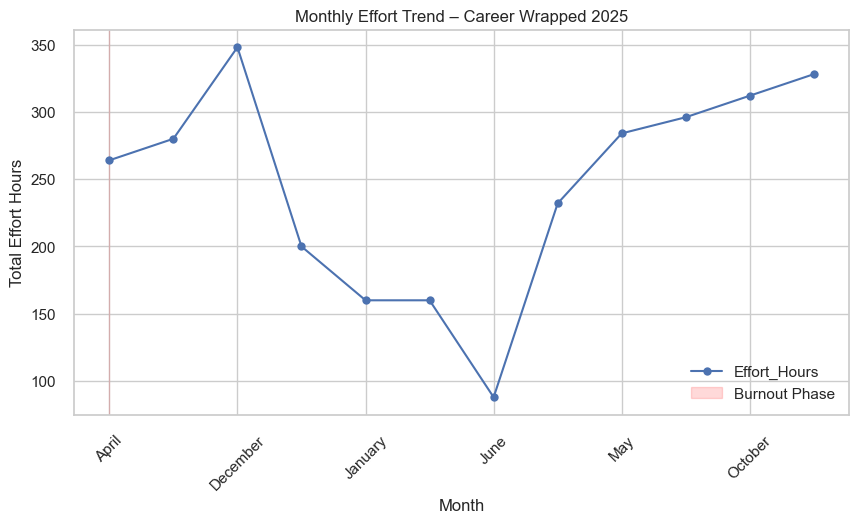

In [57]:
monthly_effort = df.groupby("Month")["Effort_Hours"].sum()
monthly_effort

plt.figure(figsize=(10,5))
monthly_effort.plot(marker="o")

plt.title("Monthly Effort Trend – Career Wrapped 2025")
plt.xlabel("Month")
plt.ylabel("Total Effort Hours")

plt.xticks(rotation=45)
plt.axvspan("June", "June", color="red", alpha=0.15, label="Burnout Phase")
plt.legend()

plt.show()


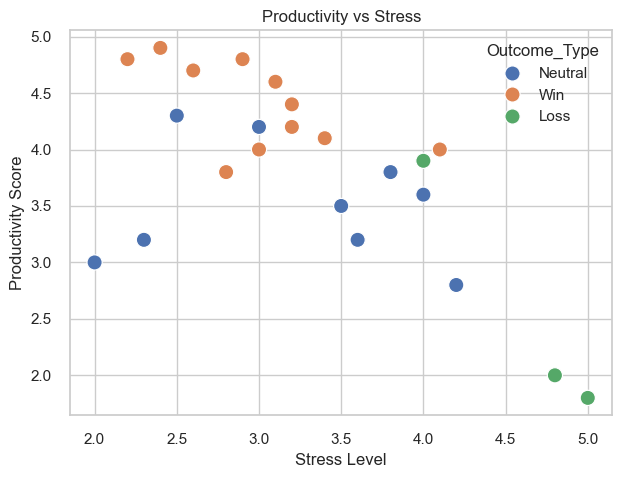

In [58]:
df[["Productivity_Score", "Stress_Level"]].corr()

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="Stress_Level",
    y="Productivity_Score",
    hue="Outcome_Type",
    s=120
)

plt.title("Productivity vs Stress")
plt.xlabel("Stress Level")
plt.ylabel("Productivity Score")

plt.show()


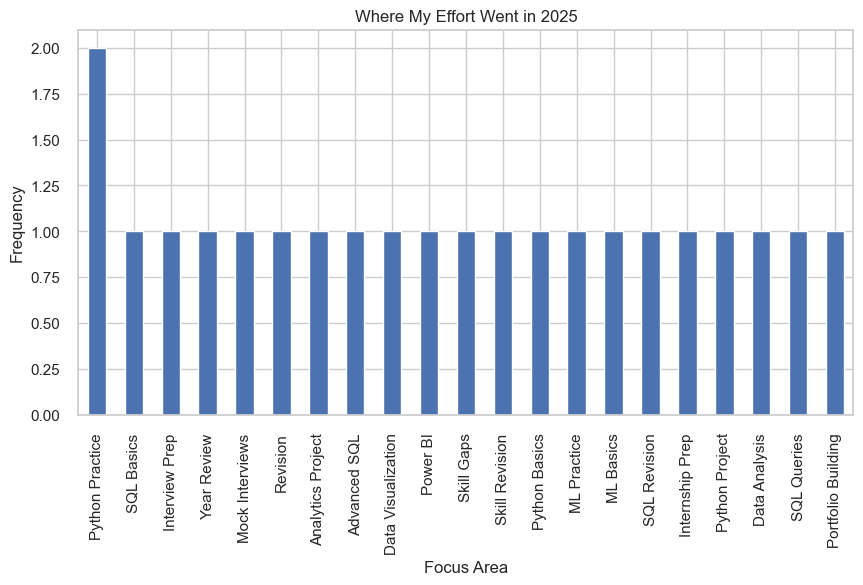

In [59]:
focus_counts = df["Focus_Area"].value_counts()
focus_counts

plt.figure(figsize=(10,5))
focus_counts.plot(kind="bar")

plt.title("Where My Effort Went in 2025")
plt.xlabel("Focus Area")
plt.ylabel("Frequency")

plt.show()



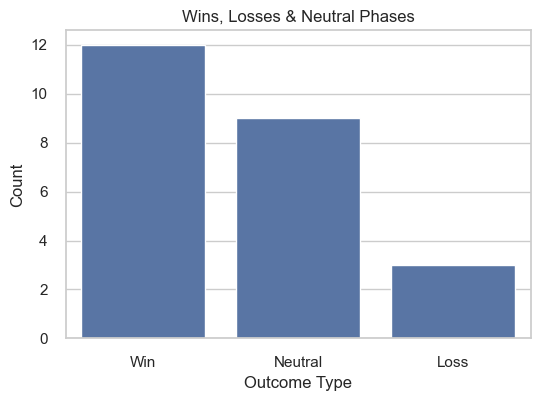

In [60]:
outcome_counts = df["Outcome_Type"].value_counts()
outcome_counts

plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x="Outcome_Type",
    order=["Win", "Neutral", "Loss"]
)

plt.title("Wins, Losses & Neutral Phases")
plt.xlabel("Outcome Type")
plt.ylabel("Count")

plt.show()


In [61]:
burnout_df = df[df["Experience_Tag"] == "Burnout"]
burnout_df[["Date", "Stress_Level", "Productivity_Score", "Highlight"]]


,Date,Stress_Level,Productivity_Score,Highlight
10,2025-06-06,4.8,2.0,Felt overwhelmed
11,2025-06-22,5.0,1.8,Learning break


In [62]:
df[df["Date"] > burnout_df["Date"].max()][
    ["Date", "Experience_Tag", "Productivity_Score", "Stress_Level"]
].head()


,Date,Experience_Tag,Productivity_Score,Stress_Level
12,2025-07-08,Recovery,2.8,4.2
13,2025-07-26,Recovery,3.2,3.6
14,2025-08-05,Rejection,3.9,4.0
15,2025-08-23,Learning,4.1,3.4
16,2025-09-09,Project,4.6,3.1


In [63]:
df[["Date", "Experience_Tag", "Highlight", "Reflection"]]


,Date,Experience_Tag,Highlight,Reflection
0,2025-01-05,Learning,Restarted SQL journey,Starting slow but steady
1,2025-01-22,Learning,Python fundamentals,Foundations matter
2,2025-02-08,Mini Project,Wrote complex queries,Practice builds confidence
3,2025-02-25,Mini Project,Built scripts,Hands-on > theory
4,2025-03-10,Learning,Studied analytics concepts,Understanding takes time
5,2025-03-26,Project,Completed mini project,Projects reinforce learning
6,2025-04-09,Preparation,Resume & basics prep,Consistency is key
7,2025-04-24,Learning,Revised SQL,Revision improves clarity
8,2025-05-07,Learning,Started ML,Complex topics need patience
9,2025-05-21,Project,Applied ML concepts,Application brings clarity


In [64]:
df[df["Outcome_Type"].isin(["Win", "Loss"])][
    ["Date", "Experience_Tag", "Highlight"]
]


,Date,Experience_Tag,Highlight
2,2025-02-08,Mini Project,Wrote complex queries
3,2025-02-25,Mini Project,Built scripts
5,2025-03-26,Project,Completed mini project
7,2025-04-24,Learning,Revised SQL
9,2025-05-21,Project,Applied ML concepts
10,2025-06-06,Burnout,Felt overwhelmed
11,2025-06-22,Burnout,Learning break
14,2025-08-05,Rejection,Interview not cleared
15,2025-08-23,Learning,Worked on weak areas
16,2025-09-09,Project,Built dashboards
